<a href="https://colab.research.google.com/github/samsaran11/mainflow-task1/blob/main/intern_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
file_path = 'student-mat.csv'
student_data = pd.read_csv(file_path, sep=';')  # Assuming the dataset uses a semicolon as a separator

# Display the first few rows
print(student_data.head())


  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Check for missing values
missing_values = student_data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Display column data types
column_types = student_data.dtypes
print("\nColumn data types:\n", column_types)

# Understand the dataset's size
dataset_shape = student_data.shape
print("\nDataset size (rows, columns):", dataset_shape)


Missing values in each column:
 school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Column data types:
 school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery

In [ ]:
# Handle missing values: Replace with median or remove rows
if student_data.isnull().sum().any():
    student_data.fillna(student_data.median(numeric_only=True), inplace=True)  # Replace numeric missing values with the median
    student_data.fillna("Unknown", inplace=True)  # Replace non-numeric missing values with 'Unknown'
print("Missing values handled.")

# Remove duplicate entries
student_data_cleaned = student_data.drop_duplicates()
print("Duplicates removed.")

# Display the size of the cleaned dataset
print("\nCleaned dataset size (rows, columns):", student_data_cleaned.shape)


Missing values handled.
Duplicates removed.

Cleaned dataset size (rows, columns): (395, 33)


In [ ]:
# 1. Average score in math (G3)
average_score_g3 = student_data_cleaned['G3'].mean()
print(f"Average score in math (G3): {average_score_g3:.2f}")

# 2. Number of students scoring above 15 in their final grade (G3)
students_above_15 = student_data_cleaned[student_data_cleaned['G3'] > 15].shape[0]
print(f"Number of students scoring above 15 in G3: {students_above_15}")

# 3. Correlation between study time and final grade (G3)
correlation_studytime_g3 = student_data_cleaned['studytime'].corr(student_data_cleaned['G3'])
print(f"Correlation between study time and G3: {correlation_studytime_g3:.2f}")

# 4. Gender with a higher average final grade (G3)
average_g3_by_gender = student_data_cleaned.groupby('sex')['G3'].mean()
higher_average_gender = average_g3_by_gender.idxmax()
print(f"Gender with a higher average G3: {higher_average_gender}")
print("Average final grades by gender:\n", average_g3_by_gender)


Average score in math (G3): 10.42
Number of students scoring above 15 in G3: 40
Correlation between study time and G3: 0.10
Gender with a higher average G3: M
Average final grades by gender:
 sex
F     9.966346
M    10.914439
Name: G3, dtype: float64


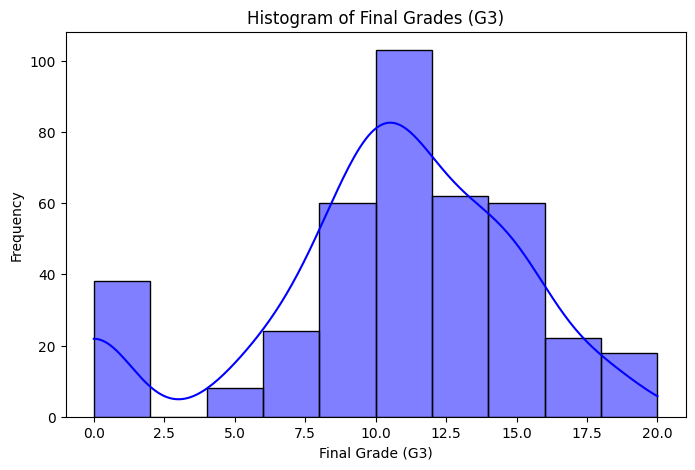

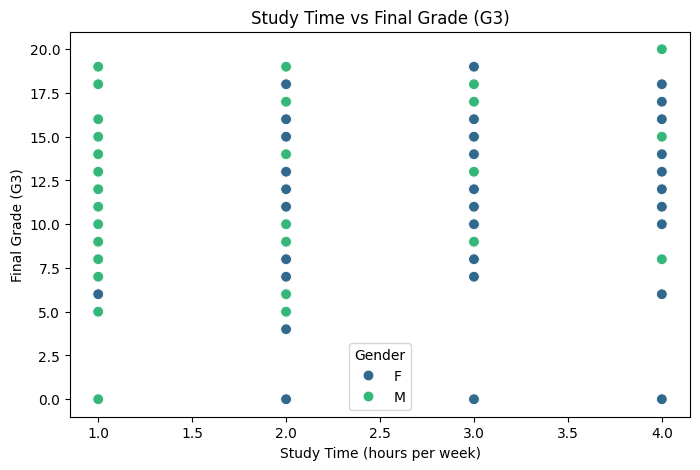

<ipython-input-6-f8ccae46b347>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_scores_by_gender, x='sex', y='G3', palette='muted')


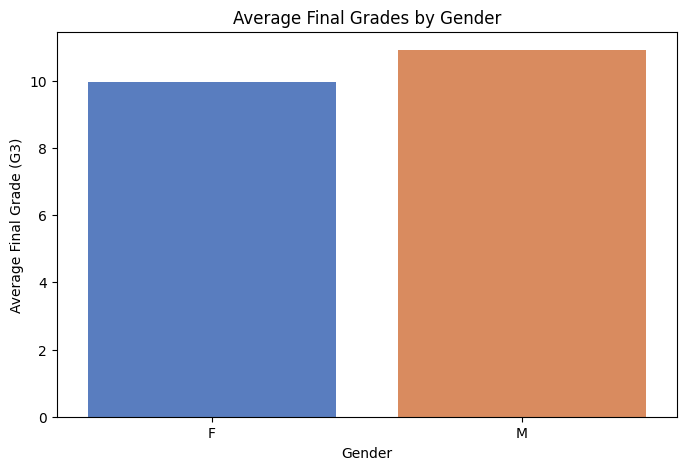

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histogram of final grades (G3)
plt.figure(figsize=(8, 5))
sns.histplot(student_data_cleaned['G3'], bins=10, kde=True, color='blue')
plt.title('Histogram of Final Grades (G3)')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Frequency')
plt.show()

# 2. Scatter plot between study time and final grade (G3)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=student_data_cleaned, x='studytime', y='G3', hue='sex', palette='viridis', s=60)
plt.title('Study Time vs Final Grade (G3)')
plt.xlabel('Study Time (hours per week)')
plt.ylabel('Final Grade (G3)')
plt.legend(title='Gender')
plt.show()

# 3. Bar chart comparing the average scores of male and female students
average_scores_by_gender = student_data_cleaned.groupby('sex')['G3'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=average_scores_by_gender, x='sex', y='G3', palette='muted')
plt.title('Average Final Grades by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Final Grade (G3)')
plt.show()
